In [1]:
# Importing the OpenCV library for computer vision tasks such as image processing
import cv2

# Importing the pyplot module from the matplotlib library for plotting and visualizing images/graphs
import matplotlib.pyplot as plt

# Importing the randrange function from the random module to generate random numbers
from random import randrange


In [2]:
# Loading a pre-trained model for detecting frontal faces using Haar Cascades.
# 'haarcascade_frontalface_default.xml' is an XML file containing data used for face detection.
frontal_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Loading a pre-trained model for detecting profile faces (side view) using Haar Cascades.
# 'haarcascade_profileface.xml' is an XML file used for detecting profile faces.
profile_face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_profileface.xml')


In [3]:
# Reading the image file 'img_use.jpg' using OpenCV's imread function.
# The image is loaded into the variable 'img' as a multi-dimensional NumPy array.
img = cv2.imread('img_use.jpg')


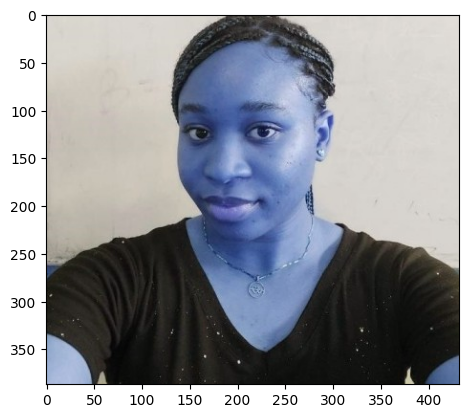

In [4]:
# Displaying the image using Matplotlib's imshow function.
plt.imshow(img)

In [5]:
# Converting the loaded image 'img' from BGR color format to grayscale using OpenCV's cvtColor function.
grayscaled_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


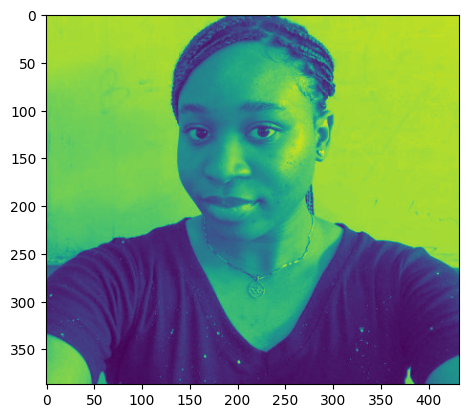

In [6]:
# Displaying the image using Matplotlib's imshow function.
plt.imshow(grayscaled_img)

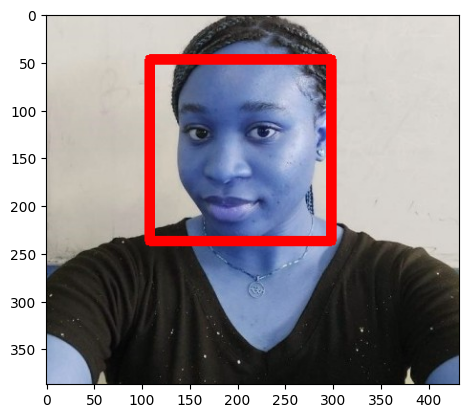

In [8]:
# Drawing a rectangle on the image to capture the face
plt.imshow(cv2.rectangle(img, (108, 47), (108+190, 47+190), (255,0,0), 10))

In [10]:
def detect_face_from_image(image):
    
    # Read Image
    img = cv2.imread(image)
    
    # Convert image to gray scale
    grayscaled_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    #  Fetch coordinates of face
    face_coordinates = frontal_face_cascade.detectMultiScale(grayscaled_img)
    profile_coordinates = profile_face_cascade.detectMultiScale(grayscaled_img)
    
    # Loop through each coordinate in the face_coordinates list
    for (x,y,w,h) in face_coordinates:
        cv2.rectangle(img, (x, y), (x+w, y+w), (randrange(0,255),randrange(0,255),randrange(0,255)), 5)
    
    for (x,y,w,h) in profile_coordinates:
        cv2.rectangle(img, (x, y), (x+w, y+w), (randrange(0,255),randrange(0,255),randrange(0,255)), 5)
    
    # Show image in window
    cv2.imshow("Clever Programmer Face Detector", img)
    key = cv2.waitKey()
        

In [11]:
detect_face_from_image('5.jpg')

In [23]:
def detect_face_from_video(video):
    
    # Read Video
    vid = cv2.VideoCapture(video)
    
    while True:
        
        # Read the current frame
        successful_frame_read, frame = vid.read()

        if successful_frame_read:
            # Convert video to grayscale
            grayscaled_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        else:
            print("Video ended")
            break

        #  Fetch coordinates of face
        face_coordinates = frontal_face_cascade.detectMultiScale(grayscaled_frame)   
        profile_coordinates = profile_face_cascade.detectMultiScale(grayscaled_frame)
    
        # Loop through each coordinate in the face_coordinates list
        for (x,y,w,h) in face_coordinates:
            cv2.rectangle(frame, (x, y), (x+w, y+w), (randrange(0,255),randrange(0,255),randrange(0,255)), 2)

        for (x,y,w,h) in profile_coordinates:
            cv2.rectangle(frame, (x, y), (x+w, y+w), (randrange(0,255),randrange(0,255),randrange(0,255)), 2)

        # Show image in window
        cv2.imshow("Clever Programmer Face Detector", frame)
        key = cv2.waitKey(1)
        
        if key == 81 or key == 113:
            break
        
    vid.release()
        

In [24]:
detect_face_from_video("vid_1.mp4")